# Loading Files


In [1]:
import zipfile
import os

zip_file_path = '/content/trimmed.zip'
extract_dir = '/content'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Extracted files to {extract_dir}")


Extracted files to /content


In [2]:
import shutil

base_path = '/content/trimmed'
train_data_path = '/content/train_data'

# Create subfolders for walking, standing, and sitting
os.makedirs(os.path.join(train_data_path, 'walking'), exist_ok=True)
os.makedirs(os.path.join(train_data_path, 'standing'), exist_ok=True)
os.makedirs(os.path.join(train_data_path, 'sitting'), exist_ok=True)

## Organizing data for training


In [3]:
# Function to organize data for subjects 1 to 18
def organize_data_for_subjects(subject_ids, base_path, data_path):
    sitting_count = 1
    walking_count = 1
    standing_count = 1

    # Loop through all subjects and scenes
    for subject in subject_ids:
        for scene in range(1, 5):
            scene_path_acc = os.path.join(base_path, 'acc_phone_clip', f'subject{subject}', f'scene{scene}')

            # Check if the scene path exists
            if os.path.isdir(scene_path_acc):
                for session_folder in os.listdir(scene_path_acc):
                    session_path = os.path.join(scene_path_acc, session_folder)

                    if os.path.isdir(session_path):
                        if scene == 3:
                            if session_folder in ['session3', 'session4']:  # Only consider session 3 and 4 for sitting
                                # Rename all CSV files in these sessions to 'sitting1.csv', 'sitting2.csv', etc.
                                for file in os.listdir(session_path):
                                    if file.endswith('.csv'):
                                        old_file_path = os.path.join(session_path, file)
                                        new_file_name = f'sitting{sitting_count}.csv'
                                        new_file_path = os.path.join(data_path, 'sitting', new_file_name)
                                        shutil.move(old_file_path, new_file_path)
                                        print(f"Renamed and moved {old_file_path} to {new_file_path}")
                                        sitting_count += 1
                            else:
                                print(f"Ignored {session_folder} in Scene 3 for sitting.")

                        else:  # For Scene 1, 2, and 4, we expect walking or standing data
                            for file in os.listdir(session_path):
                                if file.endswith('.csv'):
                                    if 'walking' in file.lower():
                                        old_file_path = os.path.join(session_path, file)
                                        new_file_name = f'walking{walking_count}.csv'
                                        new_file_path = os.path.join(data_path, 'walking', new_file_name)
                                        shutil.move(old_file_path, new_file_path)
                                        print(f"Renamed and moved {old_file_path} to {new_file_path}")
                                        walking_count += 1

                                    elif 'standing' in file.lower():
                                        old_file_path = os.path.join(session_path, file)
                                        new_file_name = f'standing{standing_count}.csv'
                                        new_file_path = os.path.join(data_path, 'standing', new_file_name)
                                        shutil.move(old_file_path, new_file_path)
                                        print(f"Renamed and moved {old_file_path} to {new_file_path}")
                                        standing_count += 1


In [4]:
# Organize walking, standing, and sitting data for subjects 1 to 18
organize_data_for_subjects(range(1, 19), base_path, train_data_path)

print("Training data organized successfully.")

Renamed and moved /content/trimmed/acc_phone_clip/subject1/scene1/session3/walking.csv to /content/train_data/walking/walking1.csv
Renamed and moved /content/trimmed/acc_phone_clip/subject1/scene1/session3/standing.csv to /content/train_data/standing/standing1.csv
Renamed and moved /content/trimmed/acc_phone_clip/subject1/scene1/session2/walking.csv to /content/train_data/walking/walking2.csv
Renamed and moved /content/trimmed/acc_phone_clip/subject1/scene1/session2/standing.csv to /content/train_data/standing/standing2.csv
Renamed and moved /content/trimmed/acc_phone_clip/subject1/scene1/session1/walking.csv to /content/train_data/walking/walking3.csv
Renamed and moved /content/trimmed/acc_phone_clip/subject1/scene1/session1/standing.csv to /content/train_data/standing/standing3.csv
Renamed and moved /content/trimmed/acc_phone_clip/subject1/scene1/session5/walking.csv to /content/train_data/walking/walking4.csv
Renamed and moved /content/trimmed/acc_phone_clip/subject1/scene1/session5

## Organizing data for test

In [5]:
test_data_path = '/content/test_data'

# Create subfolders for walking, standing, and sitting in the test data folder
os.makedirs(os.path.join(test_data_path, 'walking'), exist_ok=True)
os.makedirs(os.path.join(test_data_path, 'standing'), exist_ok=True)
os.makedirs(os.path.join(test_data_path, 'sitting'), exist_ok=True)

In [6]:
# Function to organize test data for subjects 19 and 20
def organize_test_data(subject_ids, base_path, data_path):
    sitting_count = 1
    walking_count = 1
    standing_count = 1

    for subject in subject_ids:
        for scene in range(1, 5):  # Scenes 1 to 4
            scene_path_acc = os.path.join(base_path, 'acc_phone_clip', f'subject{subject}', f'scene{scene}')

            if os.path.isdir(scene_path_acc):
                for session_folder in os.listdir(scene_path_acc):
                    session_path = os.path.join(scene_path_acc, session_folder)

                    if os.path.isdir(session_path):
                        if scene == 3:  # Scene 3 has sitting data only for session3 and session4
                            if session_folder in ['session3', 'session4']:
                                for file in os.listdir(session_path):
                                    if file.endswith('.csv'):
                                        old_file_path = os.path.join(session_path, file)
                                        new_file_name = f'sitting{sitting_count}.csv'
                                        new_file_path = os.path.join(data_path, 'sitting', new_file_name)
                                        shutil.move(old_file_path, new_file_path)
                                        print(f"Renamed and moved {old_file_path} to {new_file_path}")
                                        sitting_count += 1
                            else:
                                print(f"Ignored {session_folder} in Scene 3 for sitting.")

                        else:  # For other scenes, look for walking and standing
                            for file in os.listdir(session_path):
                                if file.endswith('.csv'):
                                    if 'walking' in file.lower():
                                        old_file_path = os.path.join(session_path, file)
                                        new_file_name = f'walking{walking_count}.csv'
                                        new_file_path = os.path.join(data_path, 'walking', new_file_name)
                                        shutil.move(old_file_path, new_file_path)
                                        print(f"Renamed and moved {old_file_path} to {new_file_path}")
                                        walking_count += 1

                                    elif 'standing' in file.lower():
                                        old_file_path = os.path.join(session_path, file)
                                        new_file_name = f'standing{standing_count}.csv'
                                        new_file_path = os.path.join(data_path, 'standing', new_file_name)
                                        shutil.move(old_file_path, new_file_path)
                                        print(f"Renamed and moved {old_file_path} to {new_file_path}")
                                        standing_count += 1


In [7]:
# Organize test data for subjects 19 and 20
organize_test_data(range(19, 21), base_path, test_data_path)

print("Test data organized successfully.")

Renamed and moved /content/trimmed/acc_phone_clip/subject19/scene1/session3/walking.csv to /content/test_data/walking/walking1.csv
Renamed and moved /content/trimmed/acc_phone_clip/subject19/scene1/session3/standing.csv to /content/test_data/standing/standing1.csv
Renamed and moved /content/trimmed/acc_phone_clip/subject19/scene1/session2/walking.csv to /content/test_data/walking/walking2.csv
Renamed and moved /content/trimmed/acc_phone_clip/subject19/scene1/session2/standing.csv to /content/test_data/standing/standing2.csv
Renamed and moved /content/trimmed/acc_phone_clip/subject19/scene1/session1/walking.csv to /content/test_data/walking/walking3.csv
Renamed and moved /content/trimmed/acc_phone_clip/subject19/scene1/session1/standing.csv to /content/test_data/standing/standing3.csv
Renamed and moved /content/trimmed/acc_phone_clip/subject19/scene1/session5/walking.csv to /content/test_data/walking/walking4.csv
Renamed and moved /content/trimmed/acc_phone_clip/subject19/scene1/session

## Zipping organized files

In [8]:
import shutil

# Paths to your organized folders
train_folder = "/content/train_data"
test_folder = "/content/test_data"

# Create zip for train and test folders
shutil.make_archive("/content/train_data_zip", 'zip', train_folder)
shutil.make_archive("/content/test_data_zip", 'zip', test_folder)

print("Train and Test data zipped successfully!")


Train and Test data zipped successfully!


# Loading files from zip

In [9]:
from google.colab import files

files.download("/content/train_data.zip")
files.download("/content/test_data.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import zipfile
import os

zip_file_path = '/content/test_data.zip'
extract_dir = '/content/test_data'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Extracted files to {extract_dir}")


Extracted files to /content/test_data


In [2]:
import zipfile
import os

zip_file_path = '/content/train_data.zip'
extract_dir = '/content/train_data'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Extracted files to {extract_dir}")

Extracted files to /content/train_data


## Checking contents and loading files

In [3]:
import pandas as pd

# Test reading a single CSV file
test_file = "/content/train_data/standing/standing132.csv"
df = pd.read_csv(test_file, header=None)

# Print first few rows and shape of the file
print(f"Shape of {test_file}: {df.shape}")
print(f"First few rows:\n{df.head()}")


Shape of /content/train_data/standing/standing132.csv: (541, 4)
First few rows:
                          0         1          2         3
0  20181024_10:15:44.959000 -1.726929  -9.951828 -0.883499
1  20181024_10:15:44.969000 -1.633560  -9.810562 -1.134888
2  20181024_10:15:44.979000 -1.238510  -9.755493 -1.247421
3  20181024_10:15:44.989000 -0.673477  -9.877609 -1.043915
4  20181024_10:15:44.999000 -0.261673 -10.174484 -0.703934


In [4]:
import os

# List the contents of each folder to verify if CSV files exist
for activity in ['standing', 'sitting', 'walking']:
    activity_folder = os.path.join("/content/train_data", activity)
    print(f"Contents of {activity_folder}: {os.listdir(activity_folder)}")


Contents of /content/train_data/standing: ['standing236.csv', 'standing244.csv', 'standing73.csv', 'standing157.csv', 'standing257.csv', 'standing51.csv', 'standing167.csv', 'standing195.csv', 'standing189.csv', 'standing66.csv', 'standing165.csv', 'standing226.csv', 'standing68.csv', 'standing42.csv', 'standing10.csv', 'standing60.csv', 'standing26.csv', 'standing129.csv', 'standing104.csv', 'standing240.csv', 'standing134.csv', 'standing230.csv', 'standing245.csv', 'standing55.csv', 'standing215.csv', 'standing131.csv', 'standing188.csv', 'standing179.csv', 'standing47.csv', 'standing9.csv', 'standing220.csv', 'standing253.csv', 'standing153.csv', 'standing151.csv', 'standing1.csv', 'standing77.csv', 'standing135.csv', 'standing212.csv', 'standing258.csv', 'standing41.csv', 'standing183.csv', 'standing216.csv', 'standing80.csv', 'standing128.csv', 'standing191.csv', 'standing242.csv', 'standing103.csv', 'standing74.csv', 'standing24.csv', 'standing175.csv', 'standing211.csv', 'standi

In [5]:
import os
import pandas as pd
import numpy as np

def load_data(data_dir):
    X = []  # List to hold the accelerometer data
    y = []  # List to hold the labels for each file

    activity_labels = {'standing': 0, 'sitting': 1, 'walking': 2}  # Mapping activity to label

    for activity in os.listdir(data_dir):
        activity_path = os.path.join(data_dir, activity)

        for file in os.listdir(activity_path):
            file_path = os.path.join(activity_path, file)
            df = pd.read_csv(file_path)  # Load CSV data

            print(f"Loaded file: {file}, Shape: {df.shape}")

            X.append(df.values)

            y.append(activity_labels[activity])

    return X, np.array(y)

# Now let's load the data
X_train, y_train = load_data('/content/train_data')
X_test, y_test = load_data('/content/test_data')

# Check the number of files loaded and some basic info
print(f"Training data samples: {len(X_train)}")
print(f"Testing data samples: {len(X_test)}")


Loaded file: sitting162.csv, Shape: (863, 4)
Loaded file: sitting121.csv, Shape: (738, 4)
Loaded file: sitting43.csv, Shape: (458, 4)
Loaded file: sitting266.csv, Shape: (468, 4)
Loaded file: sitting70.csv, Shape: (544, 4)
Loaded file: sitting82.csv, Shape: (799, 4)
Loaded file: sitting118.csv, Shape: (722, 4)
Loaded file: sitting27.csv, Shape: (674, 4)
Loaded file: sitting322.csv, Shape: (685, 4)
Loaded file: sitting160.csv, Shape: (684, 4)
Loaded file: sitting260.csv, Shape: (411, 4)
Loaded file: sitting243.csv, Shape: (567, 4)
Loaded file: sitting254.csv, Shape: (544, 4)
Loaded file: sitting81.csv, Shape: (925, 4)
Loaded file: sitting42.csv, Shape: (1083, 4)
Loaded file: sitting166.csv, Shape: (1157, 4)
Loaded file: sitting96.csv, Shape: (831, 4)
Loaded file: sitting259.csv, Shape: (684, 4)
Loaded file: sitting112.csv, Shape: (840, 4)
Loaded file: sitting288.csv, Shape: (394, 4)
Loaded file: sitting227.csv, Shape: (455, 4)
Loaded file: sitting31.csv, Shape: (788, 4)
Loaded file: sit

# Exploratory Data Analysis

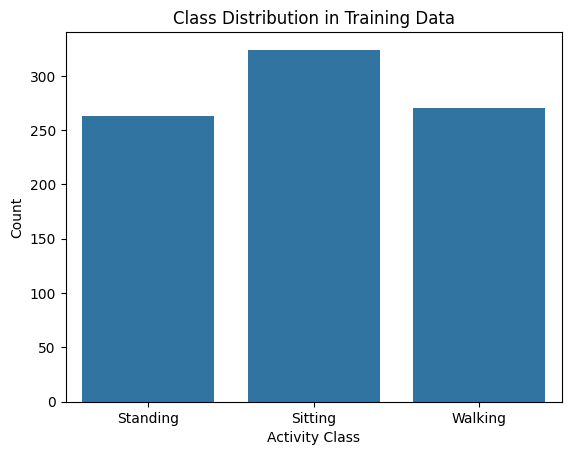

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Class distribution in the training data
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Data")
plt.xlabel("Activity Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=["Standing", "Sitting", "Walking"])
plt.show()


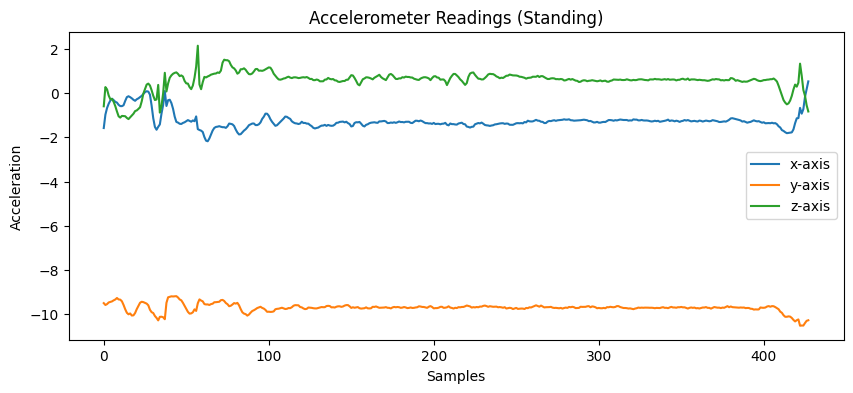

In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plt


train_path = 'train_data'

# Example accelerometer readings for the first file of the 'standing' class
activity = 'standing'
folder_path = os.path.join(train_path, activity)
files = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')])

if files:
    file = files[0]  # Take the first CSV file
    df = pd.read_csv(os.path.join(folder_path, file), header=None)
    df.columns = ['timestamp', 'x-axis', 'y-axis', 'z-axis']

    plt.figure(figsize=(10,4))
    plt.plot(df['x-axis'], label='x-axis')
    plt.plot(df['y-axis'], label='y-axis')
    plt.plot(df['z-axis'], label='z-axis')

    plt.title(f"Accelerometer Readings (Standing)")
    plt.xlabel("Samples")
    plt.ylabel("Acceleration")
    plt.legend()
    plt.show()


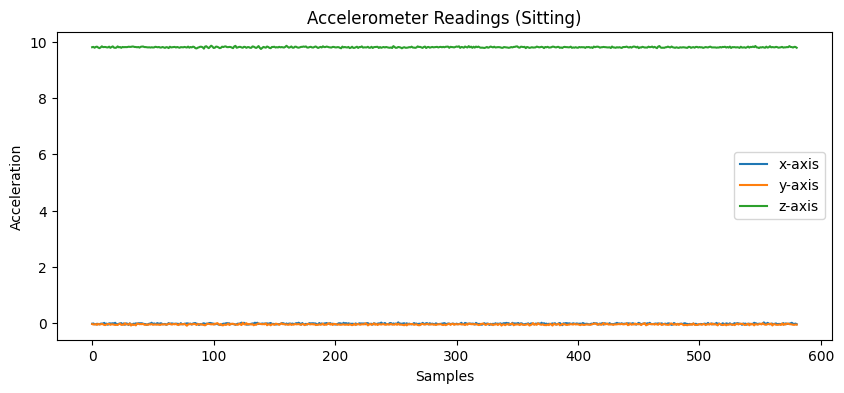

In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt

train_path = 'train_data'

# Example accelerometer readings for the first file of the 'sitting' class
activity = 'sitting'
folder_path = os.path.join(train_path, activity)
files = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')])

if files:
    file = files[0]  # Take the first CSV file
    df = pd.read_csv(os.path.join(folder_path, file), header=None)
    df.columns = ['timestamp', 'x-axis', 'y-axis', 'z-axis']

    plt.figure(figsize=(10,4))
    plt.plot(df['x-axis'], label='x-axis')
    plt.plot(df['y-axis'], label='y-axis')
    plt.plot(df['z-axis'], label='z-axis')

    plt.title(f"Accelerometer Readings (Sitting)")
    plt.xlabel("Samples")
    plt.ylabel("Acceleration")
    plt.legend()
    plt.show()


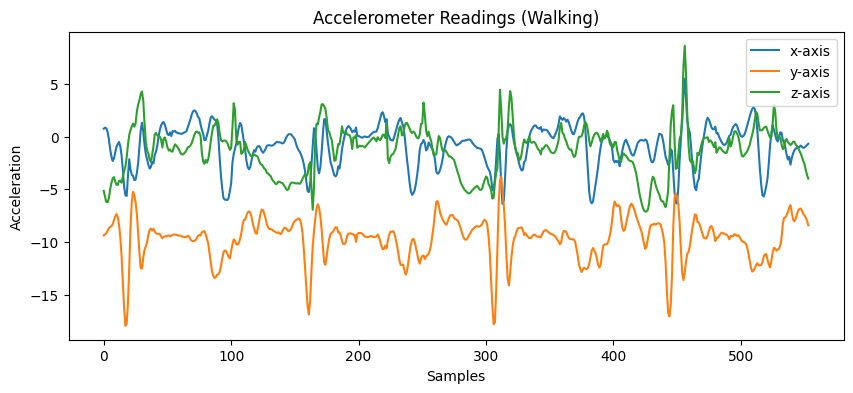

In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt

train_path = 'train_data'

# Example accelerometer readings for the first file of the 'walking' class
activity = 'walking'
folder_path = os.path.join(train_path, activity)
files = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')])

if files:
    file = files[0]  # Take the first CSV file
    df = pd.read_csv(os.path.join(folder_path, file), header=None)
    df.columns = ['timestamp', 'x-axis', 'y-axis', 'z-axis']

    plt.figure(figsize=(10,4))
    plt.plot(df['x-axis'], label='x-axis')
    plt.plot(df['y-axis'], label='y-axis')
    plt.plot(df['z-axis'], label='z-axis')

    plt.title(f"Accelerometer Readings (Walking)")
    plt.xlabel("Samples")
    plt.ylabel("Acceleration")
    plt.legend()
    plt.show()


# Building Model

In [56]:
import sklearn
print(sklearn.__version__)


1.6.1


## Loading libraries

In [8]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

## Preprocessing Data

In [9]:
# Load and preprocess data (train and test)
def load_accel_data(data_dir):
    X = []
    y = []
    activity_labels = {'standing': 0, 'sitting': 1, 'walking': 2}

    for activity in os.listdir(data_dir):
        activity_path = os.path.join(data_dir, activity)

        for file in os.listdir(activity_path):
            file_path = os.path.join(activity_path, file)
            df = pd.read_csv(file_path, header=None, names=["timestamp", "X", "Y", "Z"])
            features = extract_accel_features(df)  # Extract features from accelerometer data
            X.append(features)
            y.append(activity_labels[activity])  # Add the label for activity

    return np.array(X), np.array(y)


### Feature extraction function

In [13]:
def extract_accel_features(df):
    features = []
    features.append(np.mean(df['X']))
    features.append(np.std(df['X']))
    features.append(np.min(df['X']))
    features.append(np.max(df['X']))

    features.append(np.mean(df['Y']))
    features.append(np.std(df['Y']))
    features.append(np.min(df['Y']))
    features.append(np.max(df['Y']))

    features.append(np.mean(df['Z']))
    features.append(np.std(df['Z']))
    features.append(np.min(df['Z']))
    features.append(np.max(df['Z']))

    return np.array(features)

## Training Pipeline

In [30]:
# Training the Random Forest Model
X_train, y_train = load_accel_data('train_data')
X_test, y_test = load_accel_data('test_data')

# Fit StandardScaler on training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

## Saving the model

In [31]:
# Save the trained model to a file
joblib.dump(rf_model, 'rf_model.joblib')

# Save the scaler (optional, but useful for future use)
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

## Classification report

In [32]:
# Evaluate the model on the test data
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)  # Get class probabilities
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9896
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       1.00      1.00      1.00        36
           2       0.97      1.00      0.98        30

    accuracy                           0.99        96
   macro avg       0.99      0.99      0.99        96
weighted avg       0.99      0.99      0.99        96



## Cross validation

In [33]:
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)  # 5-fold cross-validation

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")


Cross-Validation Scores: [0.96511628 0.93023256 0.95906433 0.92397661 0.95906433]
Mean CV Accuracy: 0.9474908200734393


## Random Forest Tree Visualization

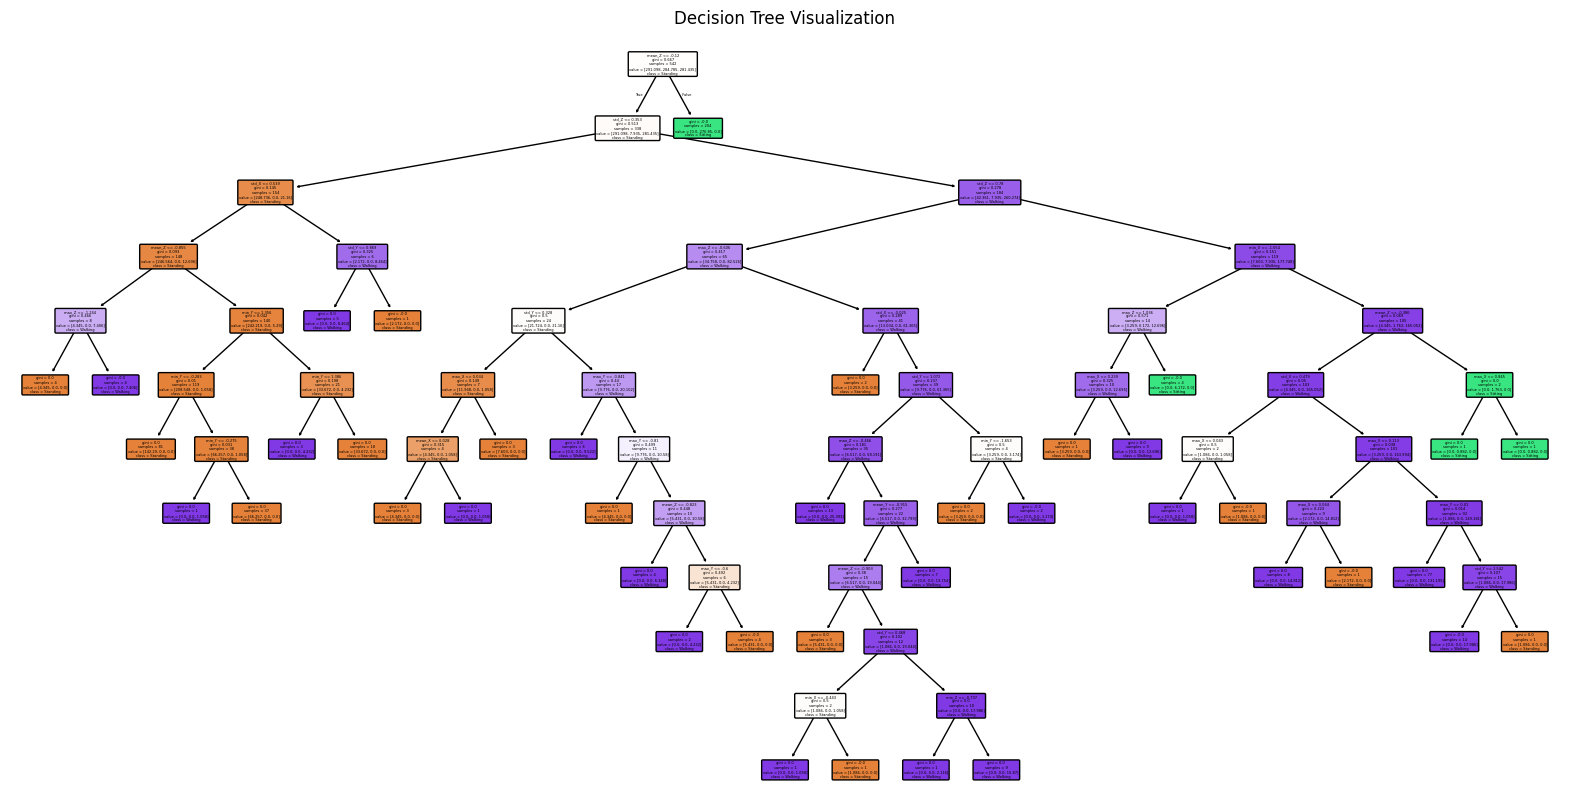

In [51]:
from sklearn.tree import plot_tree

# Visualize one tree from the Random Forest
plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=feature_names, class_names=["Standing", "Sitting", "Walking"], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


## Predicting on Test data

In [34]:
rf_model = joblib.load('rf_model.joblib')
scaler = joblib.load('scaler.joblib')

In [35]:
# Function to predict class probabilities for test CSV files
def predict_from_test_data(test_data_dir, model, scaler):
    predictions = {}

    for activity in os.listdir(test_data_dir):
        activity_path = os.path.join(test_data_dir, activity)

        for file in os.listdir(activity_path):
            file_path = os.path.join(activity_path, file)
            df = pd.read_csv(file_path, header=None, names=["timestamp", "X", "Y", "Z"])

            # Extract features from the accelerometer data
            features = extract_accel_features(df).reshape(1, -1)

            # Standardize the features using the fitted scaler
            features = scaler.transform(features)

            # Predict the class probabilities using the RF model
            prob = model.predict_proba(features)

            # Save the predicted probabilities for the current file
            predictions[file_path] = prob.flatten()

    return predictions

In [36]:
# Load test data and print class probabilities
test_data_dir = 'test_data'
predictions = predict_from_test_data(test_data_dir, rf_model, scaler)

# Print predictions for all CSV files in the test directory
for file_path, prob in predictions.items():
    print(f"Predictions for {file_path}: {prob}")

Predictions for test_data/sitting/sitting27.csv: [0. 1. 0.]
Predictions for test_data/sitting/sitting31.csv: [0.01 0.99 0.  ]
Predictions for test_data/sitting/sitting4.csv: [0.01 0.99 0.  ]
Predictions for test_data/sitting/sitting22.csv: [0.01 0.99 0.  ]
Predictions for test_data/sitting/sitting34.csv: [0. 1. 0.]
Predictions for test_data/sitting/sitting8.csv: [0. 1. 0.]
Predictions for test_data/sitting/sitting36.csv: [0. 1. 0.]
Predictions for test_data/sitting/sitting35.csv: [0. 1. 0.]
Predictions for test_data/sitting/sitting7.csv: [0. 1. 0.]
Predictions for test_data/sitting/sitting16.csv: [0. 1. 0.]
Predictions for test_data/sitting/sitting25.csv: [0. 1. 0.]
Predictions for test_data/sitting/sitting1.csv: [0. 1. 0.]
Predictions for test_data/sitting/sitting24.csv: [0. 1. 0.]
Predictions for test_data/sitting/sitting33.csv: [0. 1. 0.]
Predictions for test_data/sitting/sitting32.csv: [0. 1. 0.]
Predictions for test_data/sitting/sitting6.csv: [0.01 0.94 0.05]
Predictions for test_

## Feature Importance

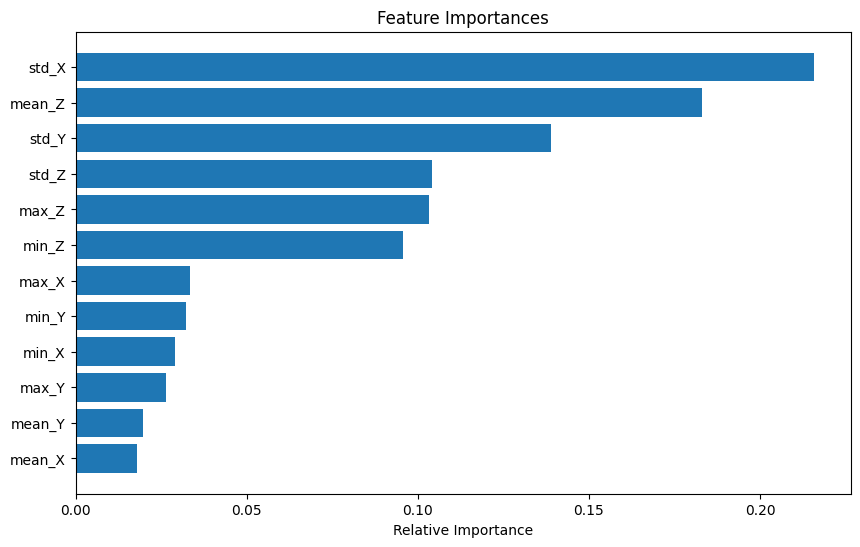

In [41]:
import joblib
import matplotlib.pyplot as plt
import numpy as np


# Assuming the number of features in the model matches what was used during training
feature_names = ['mean_X', 'std_X', 'min_X', 'max_X',
                 'mean_Y', 'std_Y', 'min_Y', 'max_Y',
                 'mean_Z', 'std_Z', 'min_Z', 'max_Z']

# Get the feature importances from the Random Forest model
importances = rf_model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), np.array(feature_names)[indices])
plt.xlabel("Relative Importance")
plt.show()


## Confusion Matrix

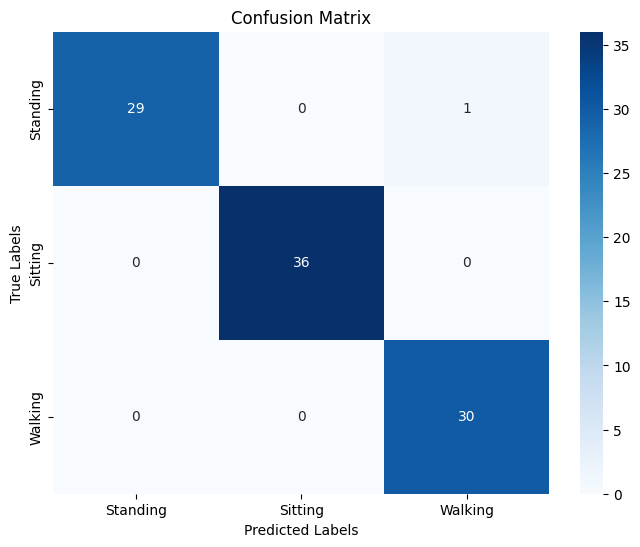

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# y_pred = rf_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Standing", "Sitting", "Walking"], yticklabels=["Standing", "Sitting", "Walking"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## Precision, Recall, F1-Score

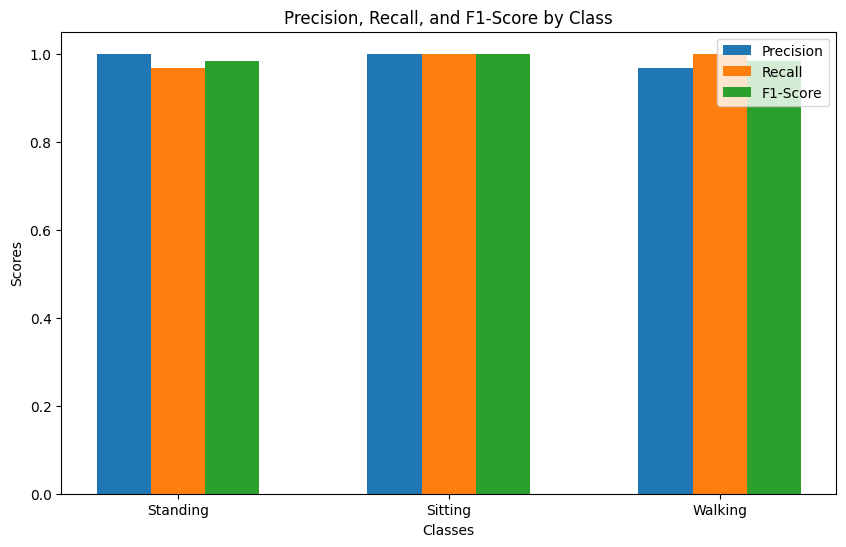

In [44]:
from sklearn.metrics import precision_recall_fscore_support

# Get precision, recall, and F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1, 2])

labels = ['Standing', 'Sitting', 'Walking']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots for Precision, Recall, F1-Score
ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1, width, label='F1-Score')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


## ROC Curve

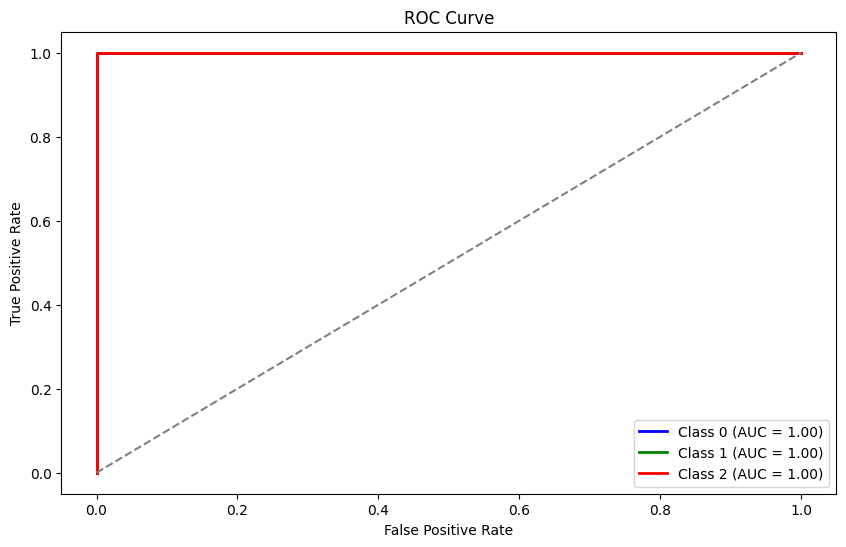

In [45]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = rf_model.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plotting the diagonal (chance line)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Validation Curve

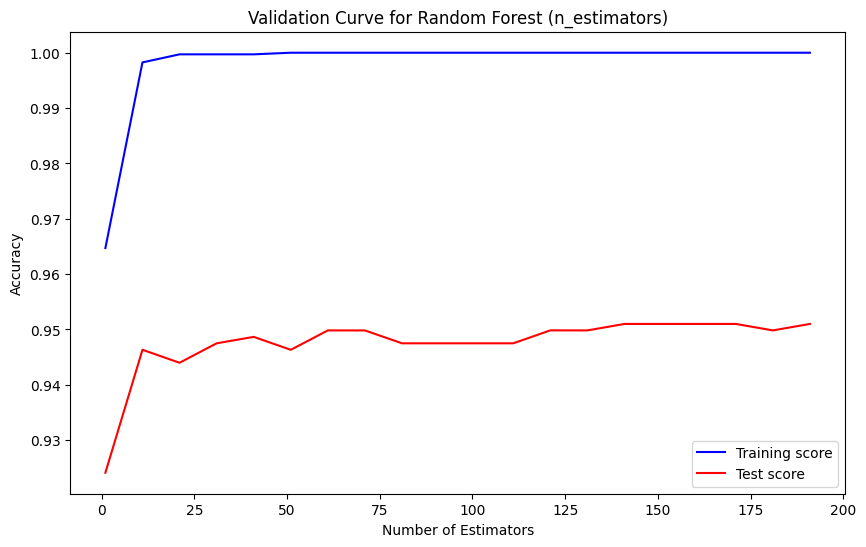

In [46]:
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Define the parameter grid for n_estimators (or any other hyperparameter)
param_range = np.arange(1, 201, 10)

# Get the validation curve for Random Forest with respect to n_estimators
train_scores, test_scores = validation_curve(
    RandomForestClassifier(random_state=42),
    X_train, y_train, param_name="n_estimators", param_range=param_range,
    scoring="accuracy", n_jobs=-1)

# Plot the validation curve
plt.figure(figsize=(10,6))
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training score", color='blue')
plt.plot(param_range, np.mean(test_scores, axis=1), label="Test score", color='red')
plt.title("Validation Curve for Random Forest (n_estimators)")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()


## Cumulative feature importance

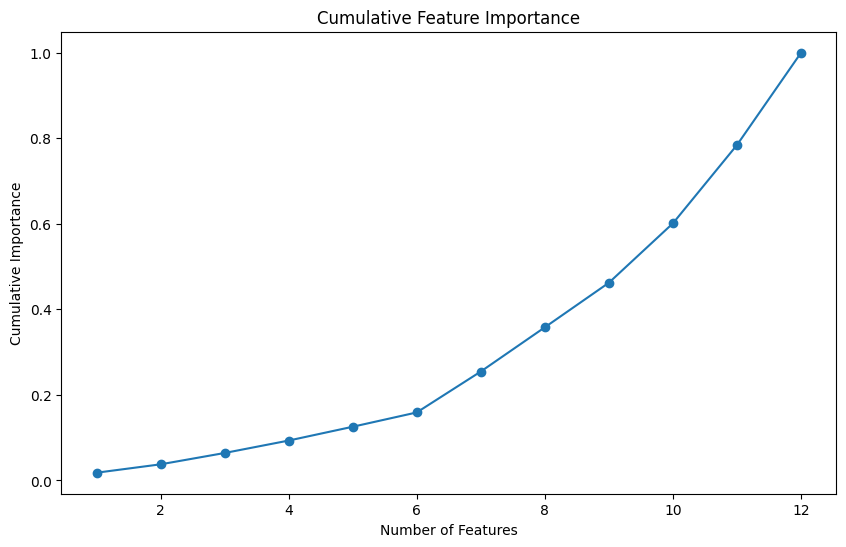

In [49]:
# Get cumulative feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)

# Cumulative sum of the feature importances
cumulative_importances = np.cumsum(importances[indices])

# Plotting cumulative feature importance
plt.figure(figsize=(10,6))
plt.plot(np.arange(1, len(cumulative_importances) + 1), cumulative_importances, marker='o')
plt.title("Cumulative Feature Importance")
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.show()


## Learning curve

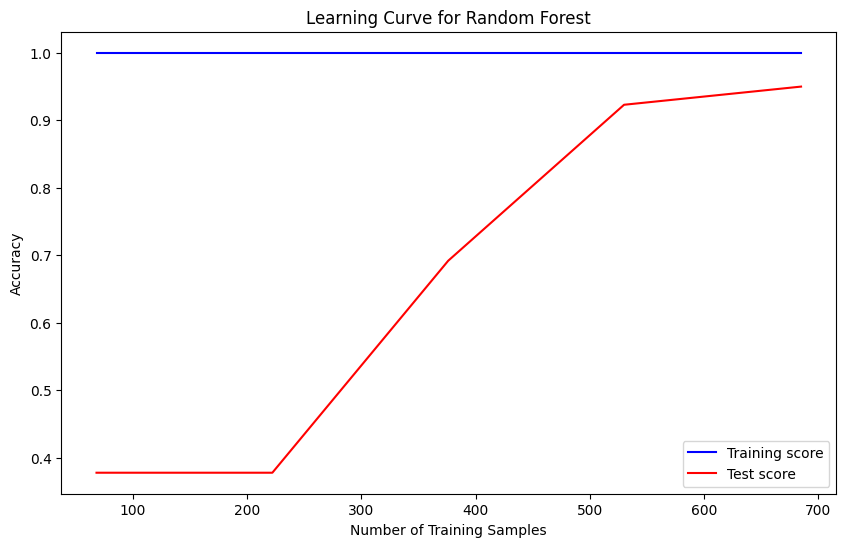

In [50]:
from sklearn.model_selection import learning_curve

# Get learning curves for Random Forest
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(n_estimators=100, random_state=42),
    X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)

# Plot the learning curve
plt.figure(figsize=(10,6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training score", color='blue')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test score", color='red')
plt.title("Learning Curve for Random Forest")
plt.xlabel("Number of Training Samples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()


In [6]:
X_train[350]

array([['20181025_11:29:03.082000', -2.5296936, -9.20076, 0.09107971],
       ['20181025_11:29:03.092000', -3.5328674, -9.385117, -0.48831177],
       ['20181025_11:29:03.102000', -3.456253, -9.787338, -1.2305145],
       ...,
       ['20181025_11:29:08.098000', 1.8181763, -14.247742, 1.1134186],
       ['20181025_11:29:08.108000', 2.402359, -13.318787, 0.54119873],
       ['20181025_11:29:08.118000', 2.3137665, -12.198303, 0.028839111]],
      dtype=object)

In [11]:
X_train[1]

array([['20181022_13:52:01.224000', -0.036621094, -0.02067566, 9.782669],
       ['20181022_13:52:01.234000', -0.024658203, -0.0063171387,
        9.799423],
       ['20181022_13:52:01.244000', -0.029434204, -0.01828003, 9.785065],
       ...,
       ['20181022_13:52:08.603000', -2.2009888, 4.5737915, 8.623871],
       ['20181022_13:52:08.613000', -2.2153473, 4.7078705, 8.607117],
       ['20181022_13:52:08.623000', -2.234497, 4.820404, 8.470642]],
      dtype=object)

In [10]:
y_train[350]

np.int64(2)

In [12]:
X_train

[array([['20181024_13:59:58.002000', 0.020843506, 0.01763916, 9.799423],
        ['20181024_13:59:58.012000', -0.027053833, 0.0104522705, 9.763519],
        ['20181024_13:59:58.022000', -0.029434204, 0.0032653809, 9.794632],
        ...,
        ['20181024_14:00:06.636000', -0.005493164, 0.024810791, 9.794632],
        ['20181024_14:00:06.646000', 0.008865356, 0.022415161, 9.797028],
        ['20181024_14:00:06.656000', -0.012680054, 0.0128479, 9.785065]],
       dtype=object),
 array([['20181022_13:52:01.224000', -0.036621094, -0.02067566, 9.782669],
        ['20181022_13:52:01.234000', -0.024658203, -0.0063171387,
         9.799423],
        ['20181022_13:52:01.244000', -0.029434204, -0.01828003, 9.785065],
        ...,
        ['20181022_13:52:08.603000', -2.2009888, 4.5737915, 8.623871],
        ['20181022_13:52:08.613000', -2.2153473, 4.7078705, 8.607117],
        ['20181022_13:52:08.623000', -2.234497, 4.820404, 8.470642]],
       dtype=object),
 array([['20181017_14:42:37.379000

In [7]:
y_train[1]

np.int64(1)